__Exercício 4__

__Part A__

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from numpy  import *
import numpy as np

__Exercise Network__: inicialização da matriz apresentada na descrição do exercício 4.

In [7]:
# graph creation
G = nx.Graph()
G.add_edge('1','2') # 1
G.add_edge('1','4')
G.add_edge('2','3') # 2
G.add_edge('2','4')
G.add_edge('3','4')
G.add_edge('3','5') # 3
G.add_edge('3','6')
G.add_edge('3','7')
G.add_edge('6','7') # 6

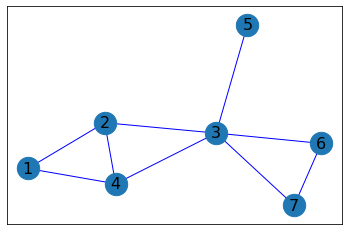

In [8]:
# drawing graph
labels = G.nodes()
pos=nx.spring_layout(G)
nx.draw_networkx(G, with_labels = True, nodecolor='r', edge_color='b', 
        node_size=500, font_size=16, pos=pos)   # default spring_layout
#plt.savefig('graph.pdf')
plt.show(True)

__Probability Matrix__: rotina para calcular a matrix de probabilidade de uma data rede.

In [6]:
def get_degrees(G):
    vk = dict(G.degree())
    vk = list(vk.values())
    degree = np.array(vk)
    return degree

In [7]:
def probability_matrix(G):
    adj_M = nx.to_numpy_matrix(G) # adjacency matrix
    degrees = get_degrees(G)
    
    for node_idx in range(len(degrees)):
        node = adj_M[node_idx]
        new_node = np.divide(node,degrees[node_idx])
        adj_M[node_idx] = new_node
    
    prob_M = adj_M
    return prob_M

In [8]:
# debuging
#probability_matrix(G)

__Power of the probability matrix__

In [9]:
from numpy.linalg import matrix_power

In [10]:
def probability_matrix_power(G,l):
    p = probability_matrix(G)
    return matrix_power(p, l)

__Exercise graph Probability Matrix__: plot da matrix de probabilidade do grafo apresentado na descrição  do exercício

In [11]:
powers = [1,10,100,1000]
pm = dict()
for power in powers:
    pm[power] = probability_matrix_power(G,power)
    print("=== Probability Matrix Powered by "+str(power)+" ===")
    print(pm[power])
    print('\n')

=== Probability Matrix Powered by 1 ===
[[0.         0.5        0.5        0.         0.         0.
  0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.         0.
  0.        ]
 [0.5        0.5        0.         0.         0.         0.
  0.        ]
 [0.         0.25       0.         0.         0.25       0.25
  0.25      ]
 [0.         0.         0.         1.         0.         0.
  0.        ]
 [0.         0.         0.         0.5        0.         0.
  0.5       ]
 [0.         0.         0.         0.5        0.         0.5
  0.        ]]


=== Probability Matrix Powered by 10 ===
[[0.15262908 0.20862269 0.15165252 0.22963284 0.05236063 0.10255112
  0.10255112]
 [0.13908179 0.21047534 0.13908179 0.21927244 0.06245579 0.11481642
  0.11481642]
 [0.15165252 0.20862269 0.15262908 0.22963284 0.05236063 0.10255112
  0.10255112]
 [0.11481642 0.16445433 0.11481642 0.2830263  0.05973307 0.13157673
  0.13157673]
 [0.10472126 0.18736738 0.10472126 0.23893229 0.0768832  0.14368731

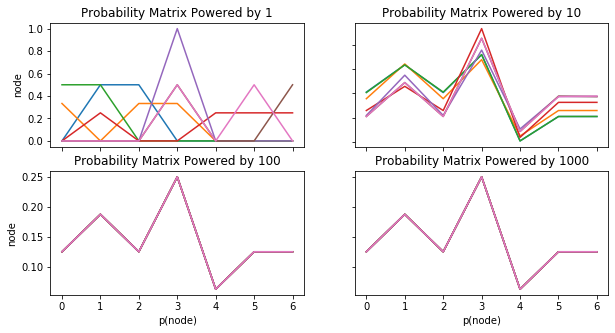

In [118]:
# ploting transpose matrix
fig, axs = plt.subplots(2, 2,figsize=(10,5))
l=1
axs[0, 0].plot(pm[l].transpose())
axs[0, 0].set_title('Probability Matrix Powered by '+str(l))

l=10
axs[0, 1].plot(pm[l].transpose())
axs[0, 1].set_title('Probability Matrix Powered by '+str(l))

l=100
axs[1, 0].plot(pm[l].transpose())
axs[1, 0].set_title('Probability Matrix Powered by '+str(l))

l=1000
axs[1, 1].plot(pm[l].transpose())
axs[1, 1].set_title('Probability Matrix Powered by '+str(l))

for ax in axs.flat:
    ax.set(xlabel='p(node)', ylabel='node')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

>__Transpose Matrix Ploting:__ A matriz transposta da matriz de probabilidade coloca a probabilidade deum nó ser percorrido iniciado-se em um determinado nó, dado agora pela coluna. Logo a figura acima mostra como a probabilidade de um nó ser percorrido torna-se independente do nó inicial .

__Comparing Probability Matrix and Nodes Degree__

In [12]:
# getting degrees
vk = dict(G.degree())
vk = list(vk.values())
degree = np.array(vk)
print('Degree', degree)

Degree [2 3 2 4 1 2 2]


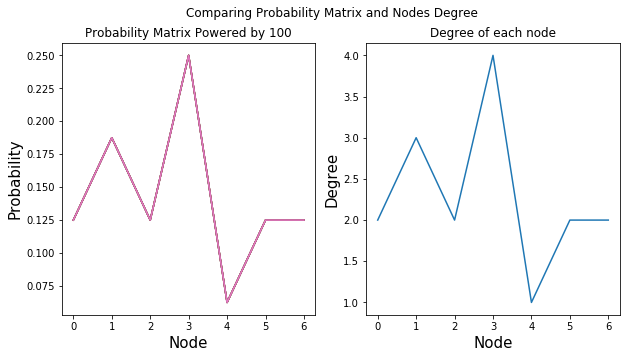

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
fig.suptitle('Comparing Probability Matrix and Nodes Degree')
# probability matrix powered by 100
l=100
ax1.plot(pm[l].transpose())
ax1.set_title('Probability Matrix Powered by '+str(l))
ax1.set_ylabel("Probability", fontsize=15)
ax1.set_xlabel("Node", fontsize=15)
# degrees
ax2.plot(degree)
ax2.set_title("Degree of each node")
ax2.set_ylabel("Degree", fontsize=15)
ax2.set_xlabel("Node", fontsize=15)


#plt.grid(True)
#plt.savefig('degree.eps') #save the figure into a file
plt.show()

>__Correlação com o grau__: Podemos observar uma grande correlação entre o grau de um nó  e a probabilidade de o mesmo ser acessado durante uma caminhada aleatória de grau alto (100 no exemplo).

__Exercio 4 - a)__ Como podemos observar com os dados apresentados anteriormente conforme __n__ aumenta a matriz tende a apresentar valores iguais de probabilidade de chegada para cada nó. Isso ocorre pois o processo pode ser interpretado como uma caminhada aleatória de passos __n__ e quanto maior o número de passos mais a probabilidade de chegada a um determinado depende menos do nó inicial e mais do grau do nó.

__Part B__

Importing ___Les_ _Miserables___ network

In [14]:
# setting up working directory
import os
os.chdir('/home/vitor/Grad/Sem/8/Redes_Complexas/');

In [39]:
# reading txt
G = nx.read_edgelist('data/lesmis.txt', nodetype=str, data=(('weight',float),))
#G = nx.convert_node_labels_to_integers(G, first_label=0)
#G = nx.from_edgelist(G)

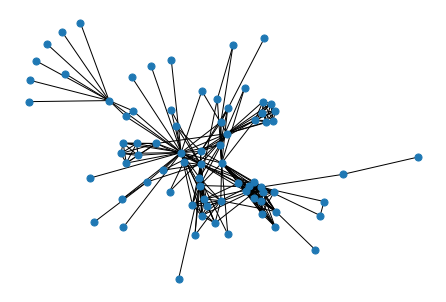

In [40]:
# printing network
def net_print(N):
    nx.draw(N, with_labels = False, node_size=50, font_size= 16)
    plt.show(True)
net_print(G)

__Distance__ calculating routine

In [41]:
def distance_matrix(G):
    N = len(G.nodes)
    D = zeros(shape=(N,N)) # D is the matrix of distances
    vl = []
    for i in arange(0,N):
        for j in arange(i+1, N):
            if(i != j):
                aux = nx.shortest_path(G,str(i+1),str(j+1))
                dij = len(aux)-1
                D[i][j] = dij
                D[j][i] = dij
                vl.append(dij)
    #x = range(0,d+1)
    
    return D

In [42]:
# debug
D = distance_matrix(G)
print(D)

[[0. 1. 2. ... 4. 4. 4.]
 [1. 0. 1. ... 3. 3. 3.]
 [2. 1. 0. ... 3. 3. 3.]
 ...
 [4. 3. 3. ... 0. 2. 2.]
 [4. 3. 3. ... 2. 0. 2.]
 [4. 3. 3. ... 2. 2. 0.]]


__Calculating A__

In [43]:
A = nx.to_numpy_matrix(G)
A_3 = matrix_power(A,3)
print(A_3)

[[   0.  199.   75. ...    0.    0.    0.]
 [ 199. 1500. 2132. ...  105.   10.    0.]
 [  75. 2132. 1308. ...   63.    6.    0.]
 ...
 [   0.  105.   63. ...   24.   15.    3.]
 [   0.   10.    6. ...   15.    0.    0.]
 [   0.    0.    0. ...    3.    0.    0.]]


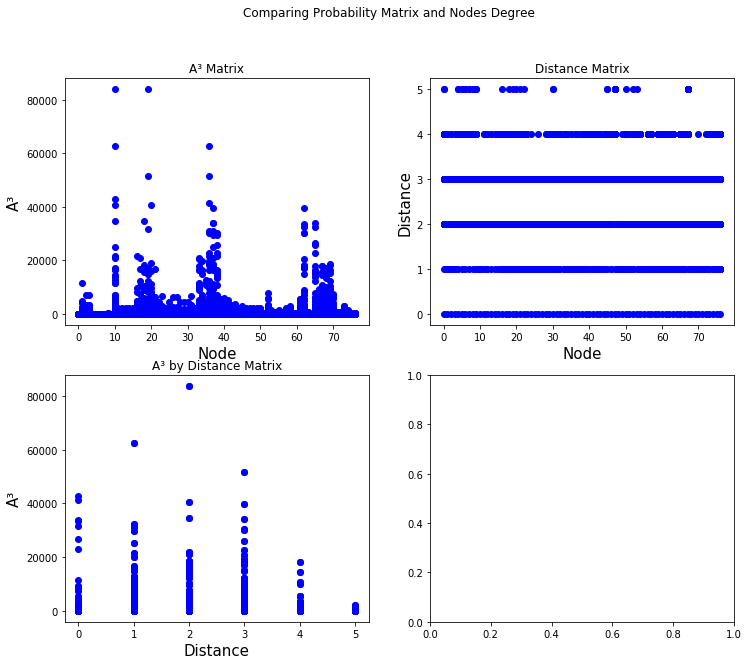

In [54]:
fig, ax = plt.subplots(2, 2,figsize=(12,10))
fig.suptitle('Comparing Probability Matrix and Nodes Degree')

# A³ matrix
ax[0,0].plot(A_3,'bo')
ax[0,0].set_title('A³ Matrix')
ax[0,0].set_ylabel("A³", fontsize=15)
ax[0,0].set_xlabel("Node", fontsize=15)
# degrees
ax[0,1].plot(D,'bo')
ax[0,1].set_title("Distance Matrix")
ax[0,1].set_ylabel("Distance", fontsize=15)
ax[0,1].set_xlabel("Node", fontsize=15)
# 
ax[1,0].plot(D,A_3,'bo')
ax[1,0].set_title('A³ by Distance Matrix')
ax[1,0].set_ylabel("A³", fontsize=15)
ax[1,0].set_xlabel("Distance", fontsize=15)

#plt.grid(True)
#plt.savefig('degree.eps') #save the figure into a file
plt.show()

__PART C__

__Correlação de Pearson__